## LDA

In [9]:
import numpy as np
import random

import os

word_dict = {}
all_words = []
document_indexes = []
# parent_dir = "pp4data/20newsgroups/"
bag_of_words = []
parent_dir = "pp4data/artificial/"
for files in os.listdir(parent_dir)[:-1]:
    read_files = parent_dir+files
    with open(read_files,'r') as f:
        lines = f.readlines()
        l = lines[0].split(" ")[:-1]
    for word in l:
        all_words.append(word)
        document_indexes.append([word,int(files)-1])
        if word in word_dict:
            word_dict[word]+=1
        else:
            word_dict.update({word:0})
    

In [15]:
word_dict

{'loan': 84, 'dollars': 68, 'bank': 162, 'river': 67, 'water': 73}

In [26]:
sorted([ int(i) for i in os.listdir(parent_dir)[:-1]])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [30]:
bag_of_words = []
word_keys = sorted(word_dict.keys())
list_dir = sorted([ int(i) for i in os.listdir(parent_dir)[:-1]])
list_dir = [str(i) for i in list_dir]
for files in list_dir:
    read_files = parent_dir+files
    # print(read_files)
    with open(read_files,'r') as f:
        lines = f.readlines()
        l = lines[0].split(" ")[:-1]
    temp_word_dict = dict().fromkeys(word_keys,0)
    for word in l:
        temp_word_dict[word]+=1
    # print(temp_word_dict)
    bag_of_words.append(list(temp_word_dict.values()))
        
bag_of_words

[[14, 18, 13, 1, 1],
 [21, 1, 4, 15, 11],
 [7, 11, 11, 2, 3],
 [17, 5, 3, 13, 20],
 [11, 7, 13, 3, 0],
 [38, 4, 4, 18, 19],
 [28, 20, 31, 2, 5],
 [14, 0, 2, 5, 5],
 [0, 2, 1, 0, 0],
 [13, 1, 3, 9, 10]]

In [3]:
K = 2
D = len(os.listdir(parent_dir)[:-1])
#Dirichlet for topic distribution
alpha = 5/K
topic_dirichlet = alpha*np.ones(K)
beta = 0.01
V = len(word_dict)
N_words = len(all_words)
word_dirichlet = beta*np.ones(V)
N_iters = 500

d_n = np.array([d for d in range(D)])
w_n = np.array([d for d in range(N_words)])
#[word,doc_name,topic]
# np.random.seed(42)
[elem.append(random.randint(0,K-1)) for elem in document_indexes]
# print(document_indexes)
# vocab_dict = {keys: (idx,vals) for idx,(keys,vals) in enumerate(word_dict.items())}
vocab_dict = dict(sorted(word_dict.items()))
# print(vocab_dict)
# vocab_dict = {keys: (idx,vals) for idx,(keys,vals) in enumerate(word_dict.items())}
idx = [i for i in range(len(vocab_dict))]
vocab_dict = {elem:idx[i] for i,elem in enumerate(vocab_dict.keys())}
print(vocab_dict)
pi_n = list(word_dict.keys())
topics_indices = [i for i in range(K)]
C_d = np.zeros((D,K))
C_t = np.zeros((K,V))

init_prob = np.zeros((1,K))
# random.shuffle(document_indexes)
z_n = [elem[2] for elem in document_indexes]

for elem in document_indexes:
    word_ = elem[0]
    doc_ = elem[1]
    topic_ = elem[2]
    word_idx_ = vocab_dict[word_]
    C_d[doc_][topic_]+=1
    C_t[topic_][word_idx_]+=1
print(C_d,C_t)

# print(C_d,C_t)

{'bank': 0, 'dollars': 1, 'loan': 2, 'river': 3, 'water': 4}
[[21. 26.]
 [19. 33.]
 [14. 20.]
 [29. 29.]
 [16. 18.]
 [39. 44.]
 [41. 45.]
 [14. 12.]
 [ 1.  2.]
 [17. 19.]] [[73. 27. 41. 33. 37.]
 [90. 42. 44. 35. 37.]]


In [4]:
for iter in range(N_iters):
    random.shuffle(document_indexes)
    for idx,elem in enumerate(document_indexes):
        #Document index: word, doc_num and initially randomly generated topic
        word = elem[0]
        doc = elem[1]
        topic = elem[2]
        word_idx = vocab_dict[word]
        
        C_d[doc][topic]-=1
        C_t[topic][word_idx]-=1
        # print(C_t)
        # break
    # break
        p_ks = []
        for k in range(K):
            c_t_sum = sum(C_t[k,:])
            c_d_sum = C_d[:,k].sum()
            P_k = ((C_t[k][word_idx] + beta)/(V*beta + c_t_sum)) * ((C_d[doc][k]+alpha)/(K*alpha + c_d_sum))
            assert P_k>=0, f'The {C_t},{C_d},{P_k}'
            p_ks.append(P_k)
        sum_pks = sum(p_ks)
        # print(p_ks)
        p_ks = [i/sum_pks for i in p_ks]
        assigned_topic = np.random.choice(topics_indices,p=p_ks)
        # print(assigned_topic)
        z_n[idx] = assigned_topic
        document_indexes[idx][2] = assigned_topic
        C_d[doc][assigned_topic]+=1
        C_t[assigned_topic][word_idx]+=1


KeyboardInterrupt: 

In [ ]:
C_d,C_t

(array([[ 5., 42.],
        [44.,  8.],
        [ 8., 26.],
        [48., 10.],
        [ 5., 29.],
        [70., 13.],
        [13., 73.],
        [23.,  3.],
        [ 0.,  3.],
        [29.,  7.]]),
 array([[103.,   0.,   0.,  68.,  74.],
        [ 60.,  69.,  85.,   0.,   0.]]))

In [ ]:
vocab_dict
indx_to_word_dict = {v:k for k,v in vocab_dict.items()}
indx_to_word_dict

{0: 'bank', 1: 'dollars', 2: 'loan', 3: 'river', 4: 'water'}

In [ ]:
np.argsort(C_t[0,:])

array([3, 4, 0, 1, 2], dtype=int64)

In [ ]:
import csv
with open('topicwords.csv', 'w') as f:
    writer = csv.writer(f)
    for j in range(K):
        print(f'For topic {j}')
        words = [f'Topic {j}']
        for i in np.argsort(C_t[j,:])[::-1][:3]:
            print(indx_to_word_dict[i])
            words.append(indx_to_word_dict[i])
        print('-------------------------------------------')
        writer.writerow(words)


For topic 0
bank
water
river
-------------------------------------------
For topic 1
loan
dollars
bank
-------------------------------------------


In [1]:
from algorithms import Algorithms

artificial = Algorithms("pp4data/artificial/",K=2)
artificial.LDATopicModelling()

Completed for 1/500
Completed for 2/500
Completed for 3/500
Completed for 4/500
Completed for 5/500
Completed for 6/500
Completed for 7/500
Completed for 8/500
Completed for 9/500
Completed for 10/500
Completed for 11/500
Completed for 12/500
Completed for 13/500
Completed for 14/500
Completed for 15/500
Completed for 16/500
Completed for 17/500
Completed for 18/500
Completed for 19/500
Completed for 20/500
Completed for 21/500
Completed for 22/500
Completed for 23/500
Completed for 24/500
Completed for 25/500
Completed for 26/500
Completed for 27/500
Completed for 28/500
Completed for 29/500
Completed for 30/500
Completed for 31/500
Completed for 32/500
Completed for 33/500
Completed for 34/500
Completed for 35/500
Completed for 36/500
Completed for 37/500
Completed for 38/500
Completed for 39/500
Completed for 40/500
Completed for 41/500
Completed for 42/500
Completed for 43/500
Completed for 44/500
Completed for 45/500
Completed for 46/500
Completed for 47/500
Completed for 48/500
C

In [3]:
artificial.write_to_csv('topicwords_artificial.csv')

For topic 0
loan
dollars
bank
-------------------------------------------
For topic 1
bank
water
river
-------------------------------------------


In [4]:
import json

with open("artificial_Cd", "w") as fp:
    json.dump(artificial.C_d.tolist(), fp)

In [8]:
artificial.C_d.tolist()

[[40.0, 7.0],
 [7.0, 45.0],
 [26.0, 8.0],
 [14.0, 44.0],
 [27.0, 7.0],
 [14.0, 69.0],
 [72.0, 14.0],
 [13.0, 13.0],
 [3.0, 0.0],
 [4.0, 32.0]]

In [5]:
artificial.write_matrix('artificial')

In [6]:
C_d,C_t = artificial.get_matrix('artificial')

In [7]:
C_d

[[41.0, 6.0],
 [8.0, 44.0],
 [27.0, 7.0],
 [12.0, 46.0],
 [26.0, 8.0],
 [13.0, 70.0],
 [69.0, 17.0],
 [4.0, 22.0],
 [3.0, 0.0],
 [8.0, 28.0]]

In [32]:
from logisticRegression import Algorithms

In [48]:
# def read_label(parent_dir):
with open(parent_dir+'index.csv','r') as f:
    lines = f.readlines()


label = [l.split("\n")[0].split(",")[1] for l in lines]
label = [int(l) for l in label]

In [49]:
artificial_ = Algorithms(bag_of_words,label)

In [59]:
data_fractions = [round(d, 1) for d in np.linspace(0.1, 1.0, 10)]
a_epochs_error_blr = {df: [] for df in data_fractions}
for epochs in range(1, 31):
        print("For Epoch")
        print(f"{epochs:-^20}")
        for data_fraction in data_fractions:
            a_blr_error, _, _, _ = artificial_.BayesianLogisticRegression(data_fraction)
            a_epochs_error_blr[data_fraction].append(a_blr_error)

For Epoch
---------1----------
For Epoch
---------2----------
For Epoch
---------3----------
For Epoch
---------4----------


q:\Machine learning\pp4\logisticRegression.py:113: RuntimeWarning: invalid value encountered in double_scalars
  np.linalg.norm(w_update - w_n) / np.linalg.norm(w_n) < 0.001


For Epoch
---------5----------
For Epoch
---------6----------
For Epoch
---------7----------
For Epoch
---------8----------
For Epoch
---------9----------
For Epoch
---------10---------
For Epoch
---------11---------
For Epoch
---------12---------
For Epoch
---------13---------
For Epoch
---------14---------
For Epoch
---------15---------
For Epoch
---------16---------
For Epoch
---------17---------
For Epoch
---------18---------
For Epoch
---------19---------
For Epoch
---------20---------
For Epoch
---------21---------
For Epoch
---------22---------
For Epoch
---------23---------
For Epoch
---------24---------
For Epoch
---------25---------
For Epoch
---------26---------
For Epoch
---------27---------
For Epoch
---------28---------
For Epoch
---------29---------
For Epoch
---------30---------


In [62]:
import matplotlib.pyplot as plt
def plot_error(blr_error: dict, title: str):
    # print(blr_error)
    mean_blr_dict = {key: sum(vals) / len(vals) for key, vals in blr_error.items()}
    std_blr_dict = {key: np.std(np.array(vals)) for key, vals in blr_error.items()}

    fig = plt.figure()
    ax = fig.add_subplot(111)
    X = mean_blr_dict.keys()
    ax.set_title(f"For dataset {title}")
    
    ax.errorbar(
        X, mean_blr_dict.values(), std_blr_dict.values(), label="Bayesian Model"
    )
    ax.set_ylabel("Error rate")
    ax.set_xlabel("Fraction of Data Set Size")
    ax.legend(loc="best")
    fig.savefig(f"{title}.png")
    plt.show()

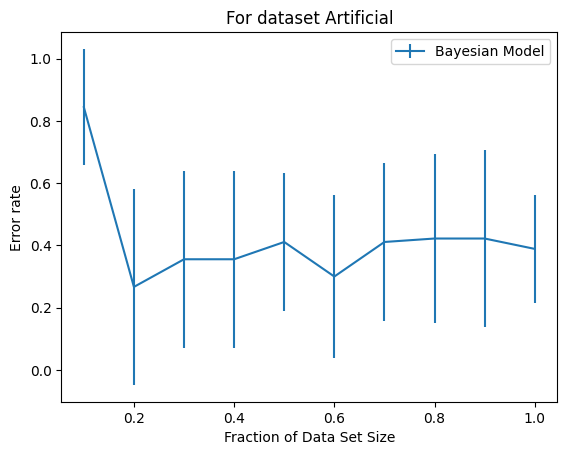

In [63]:
plot_error(a_epochs_error_blr,'Artificial')

In [1]:
from algorithms import Algorithms

artificial_alog = Algorithms("pp4data\\artificial",K=2)

Creating Bag-of-words


In [2]:
artificial_alog.LDATopicModelling()

Completed for 1/500
Completed for 2/500
Completed for 3/500
Completed for 4/500
Completed for 5/500
Completed for 6/500
Completed for 7/500
Completed for 8/500
Completed for 9/500
Completed for 10/500
Completed for 11/500
Completed for 12/500
Completed for 13/500
Completed for 14/500
Completed for 15/500
Completed for 16/500
Completed for 17/500
Completed for 18/500
Completed for 19/500
Completed for 20/500
Completed for 21/500
Completed for 22/500
Completed for 23/500
Completed for 24/500
Completed for 25/500
Completed for 26/500
Completed for 27/500
Completed for 28/500
Completed for 29/500
Completed for 30/500
Completed for 31/500
Completed for 32/500
Completed for 33/500
Completed for 34/500
Completed for 35/500
Completed for 36/500
Completed for 37/500
Completed for 38/500
Completed for 39/500
Completed for 40/500
Completed for 41/500
Completed for 42/500
Completed for 43/500
Completed for 44/500
Completed for 45/500
Completed for 46/500
Completed for 47/500
Completed for 48/500
C

In [3]:
artificial_alog.write_to_csv("topicwords_artificial.csv")

For topic 0
loan
bank
dollars
-------------------------------------------
For topic 1
bank
water
river
-------------------------------------------


In [4]:
artificial_bow_error,artificial_cd_error = artificial_alog.run_logistic()

For Epoch
---------1----------
For Epoch
---------2----------


q:\Machine learning\pp4\logisticRegression.py:113: RuntimeWarning: invalid value encountered in double_scalars
  np.linalg.norm(w_update - w_n) / np.linalg.norm(w_n) < 0.001


For Epoch
---------3----------
For Epoch
---------4----------
For Epoch
---------5----------
For Epoch
---------6----------
For Epoch
---------7----------
For Epoch
---------8----------
For Epoch
---------9----------
For Epoch
---------10---------
For Epoch
---------11---------
For Epoch
---------12---------
For Epoch
---------13---------
For Epoch
---------14---------
For Epoch
---------15---------
For Epoch
---------16---------
For Epoch
---------17---------
For Epoch
---------18---------
For Epoch
---------19---------
For Epoch
---------20---------
For Epoch
---------21---------
For Epoch
---------22---------
For Epoch
---------23---------
For Epoch
---------24---------
For Epoch
---------25---------
For Epoch
---------26---------
For Epoch
---------27---------
For Epoch
---------28---------
For Epoch
---------29---------
For Epoch
---------30---------


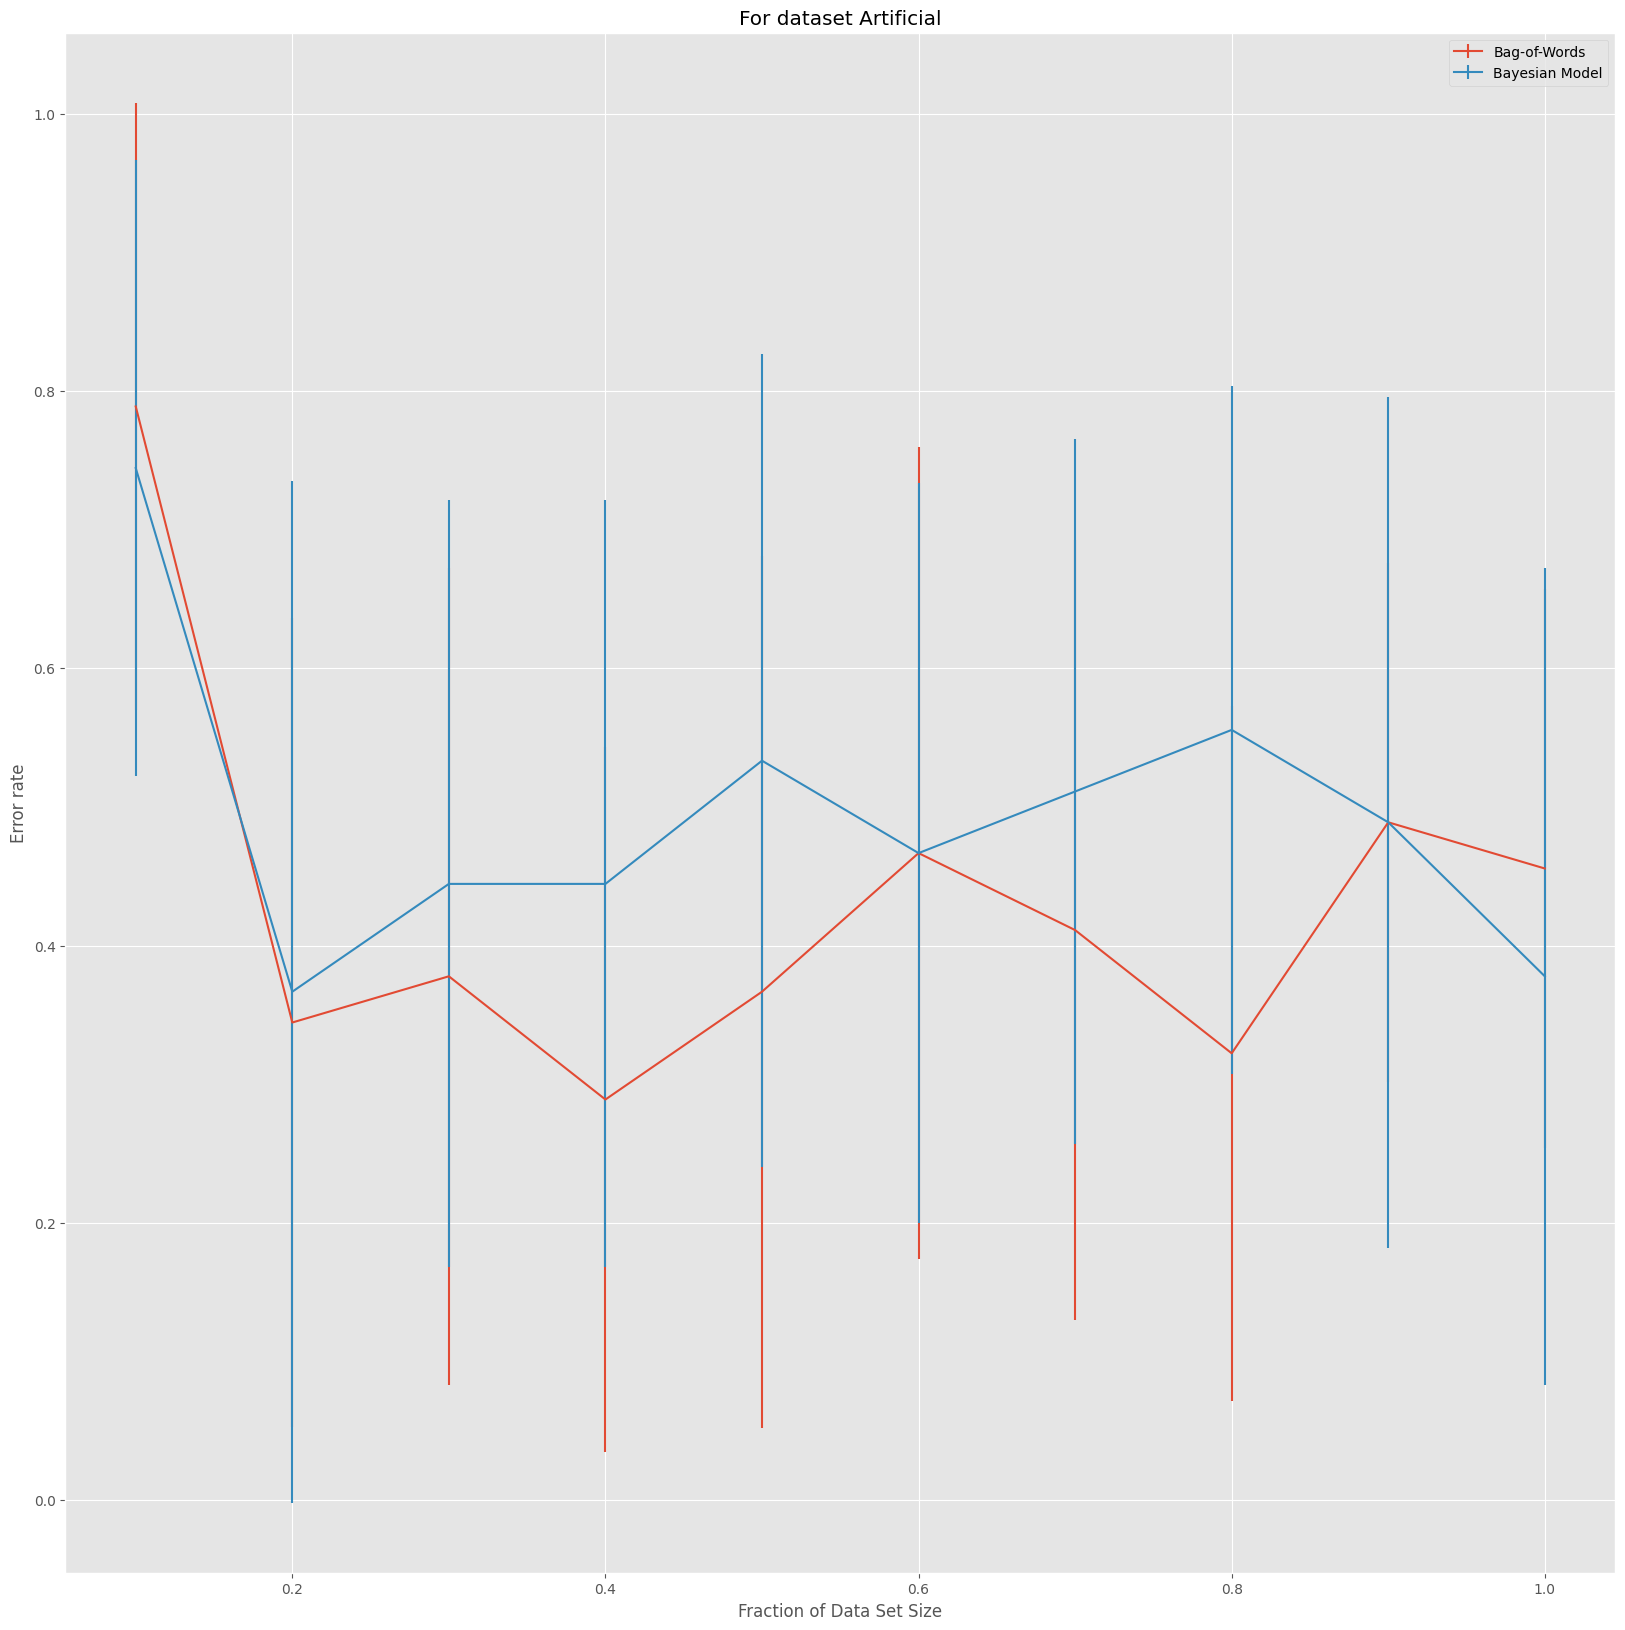

In [5]:
artificial_alog.plot_error(artificial_bow_error,artificial_cd_error,'Artificial')

In [ ]:
from algorithms import Algorithms

_alog = Algorithms("pp4data\\artificial",K=2)